<a href="https://colab.research.google.com/github/swapnilhalder01/Deep_Learning_Assignment/blob/main/Deep_Learning_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


=== Training with relu activation and SGD optimizer ===
Epoch 1/10 - Loss: 0.8155 - Accuracy: 0.7837
Epoch 2/10 - Loss: 0.3555 - Accuracy: 0.9000
Epoch 3/10 - Loss: 0.2946 - Accuracy: 0.9148
Epoch 4/10 - Loss: 0.2618 - Accuracy: 0.9246
Epoch 5/10 - Loss: 0.2381 - Accuracy: 0.9319
Epoch 6/10 - Loss: 0.2195 - Accuracy: 0.9368
Epoch 7/10 - Loss: 0.2037 - Accuracy: 0.9413
Epoch 8/10 - Loss: 0.1902 - Accuracy: 0.9456
Epoch 9/10 - Loss: 0.1783 - Accuracy: 0.9483
Epoch 10/10 - Loss: 0.1678 - Accuracy: 0.9508

=== Training with relu activation and MiniBatchSGD optimizer ===
Epoch 1/10 - Loss: 2.3605 - Accuracy: 0.1121
Epoch 2/10 - Loss: 2.1805 - Accuracy: 0.1721
Epoch 3/10 - Loss: 2.0503 - Accuracy: 0.2876
Epoch 4/10 - Loss: 1.9355 - Accuracy: 0.4190
Epoch 5/10 - Loss: 1.8257 - Accuracy: 0.5182
Epoch 6/10 - Loss: 1.7185 - Accuracy: 0.5865
Epoch 7/10 - Loss: 1.6147 - Accuracy: 0.6303
Epoch 8/10 - Loss: 1.5151 - Accuracy: 0.6641
Epoch 9/10 - Loss: 1.4205 - Accuracy: 0.6920
Epoch 10/10 - Loss: 1

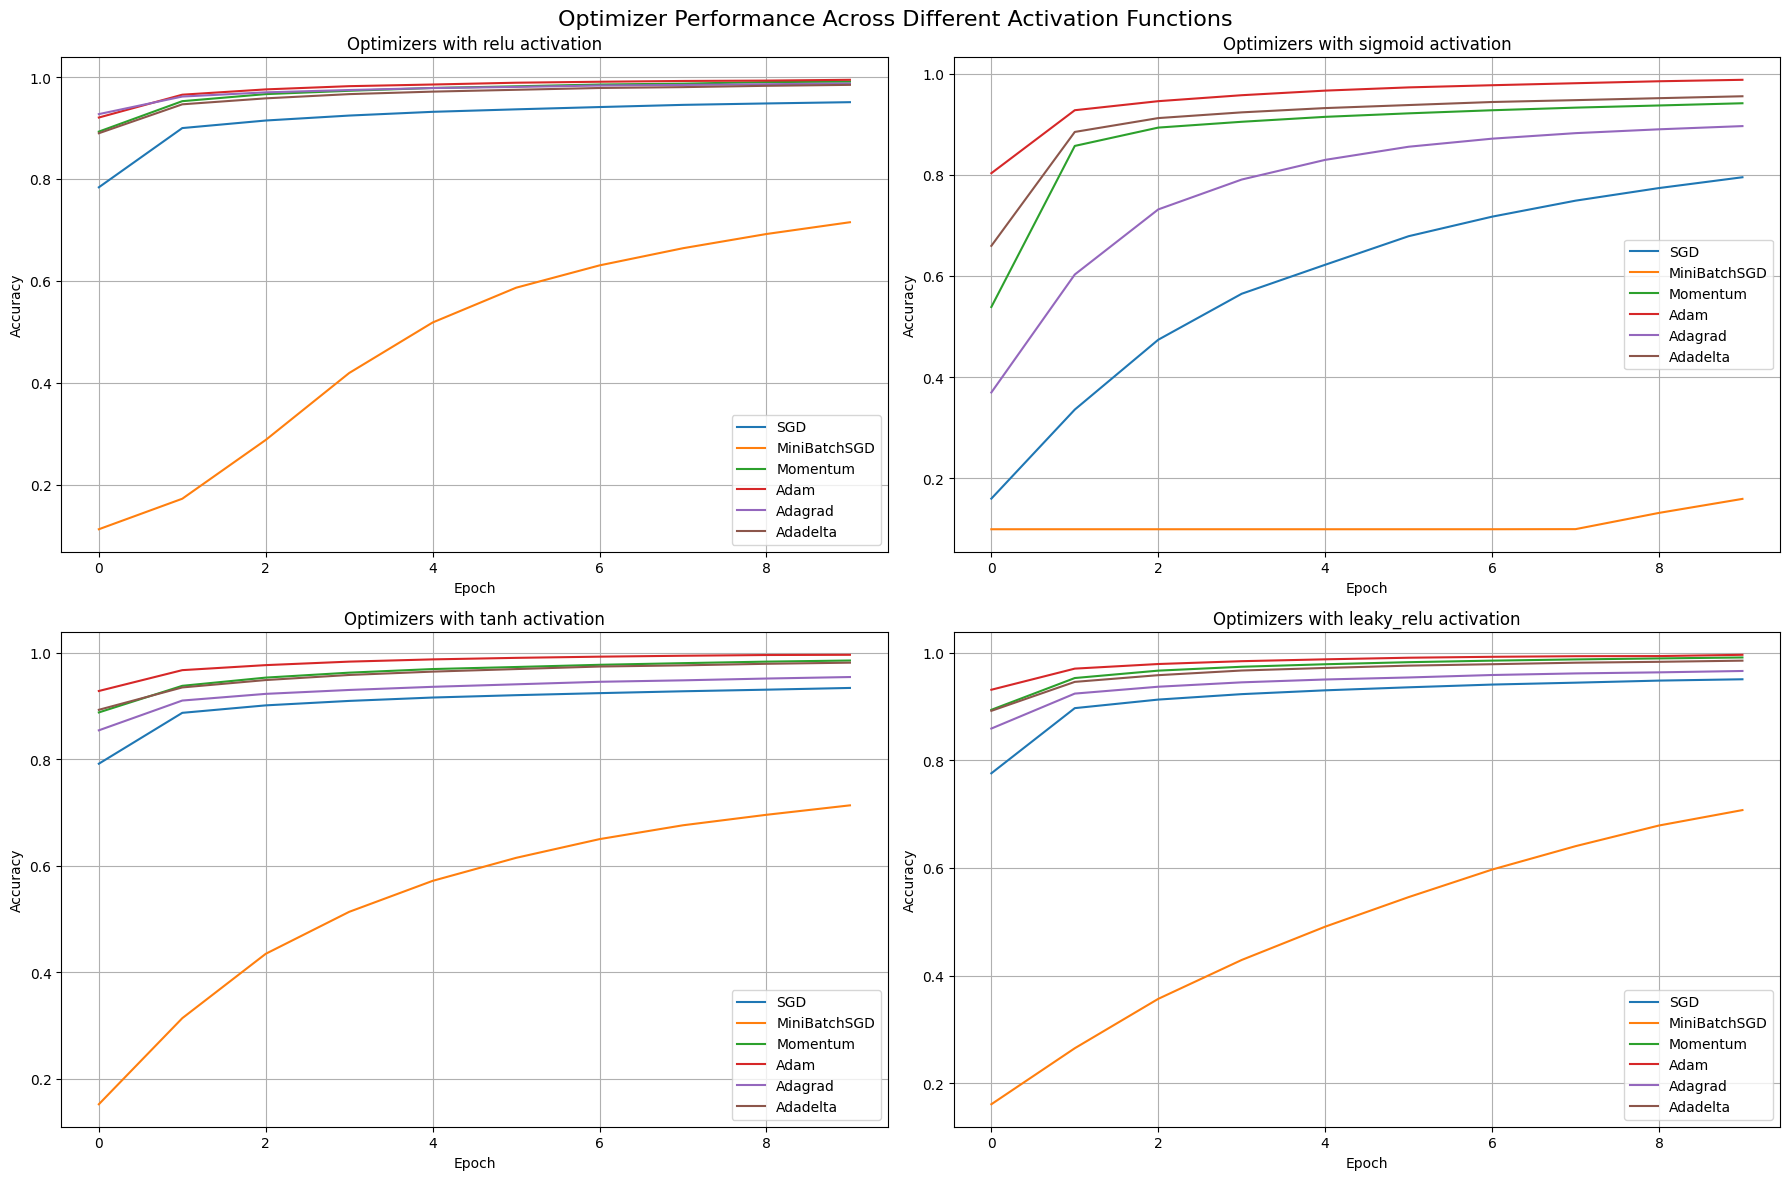

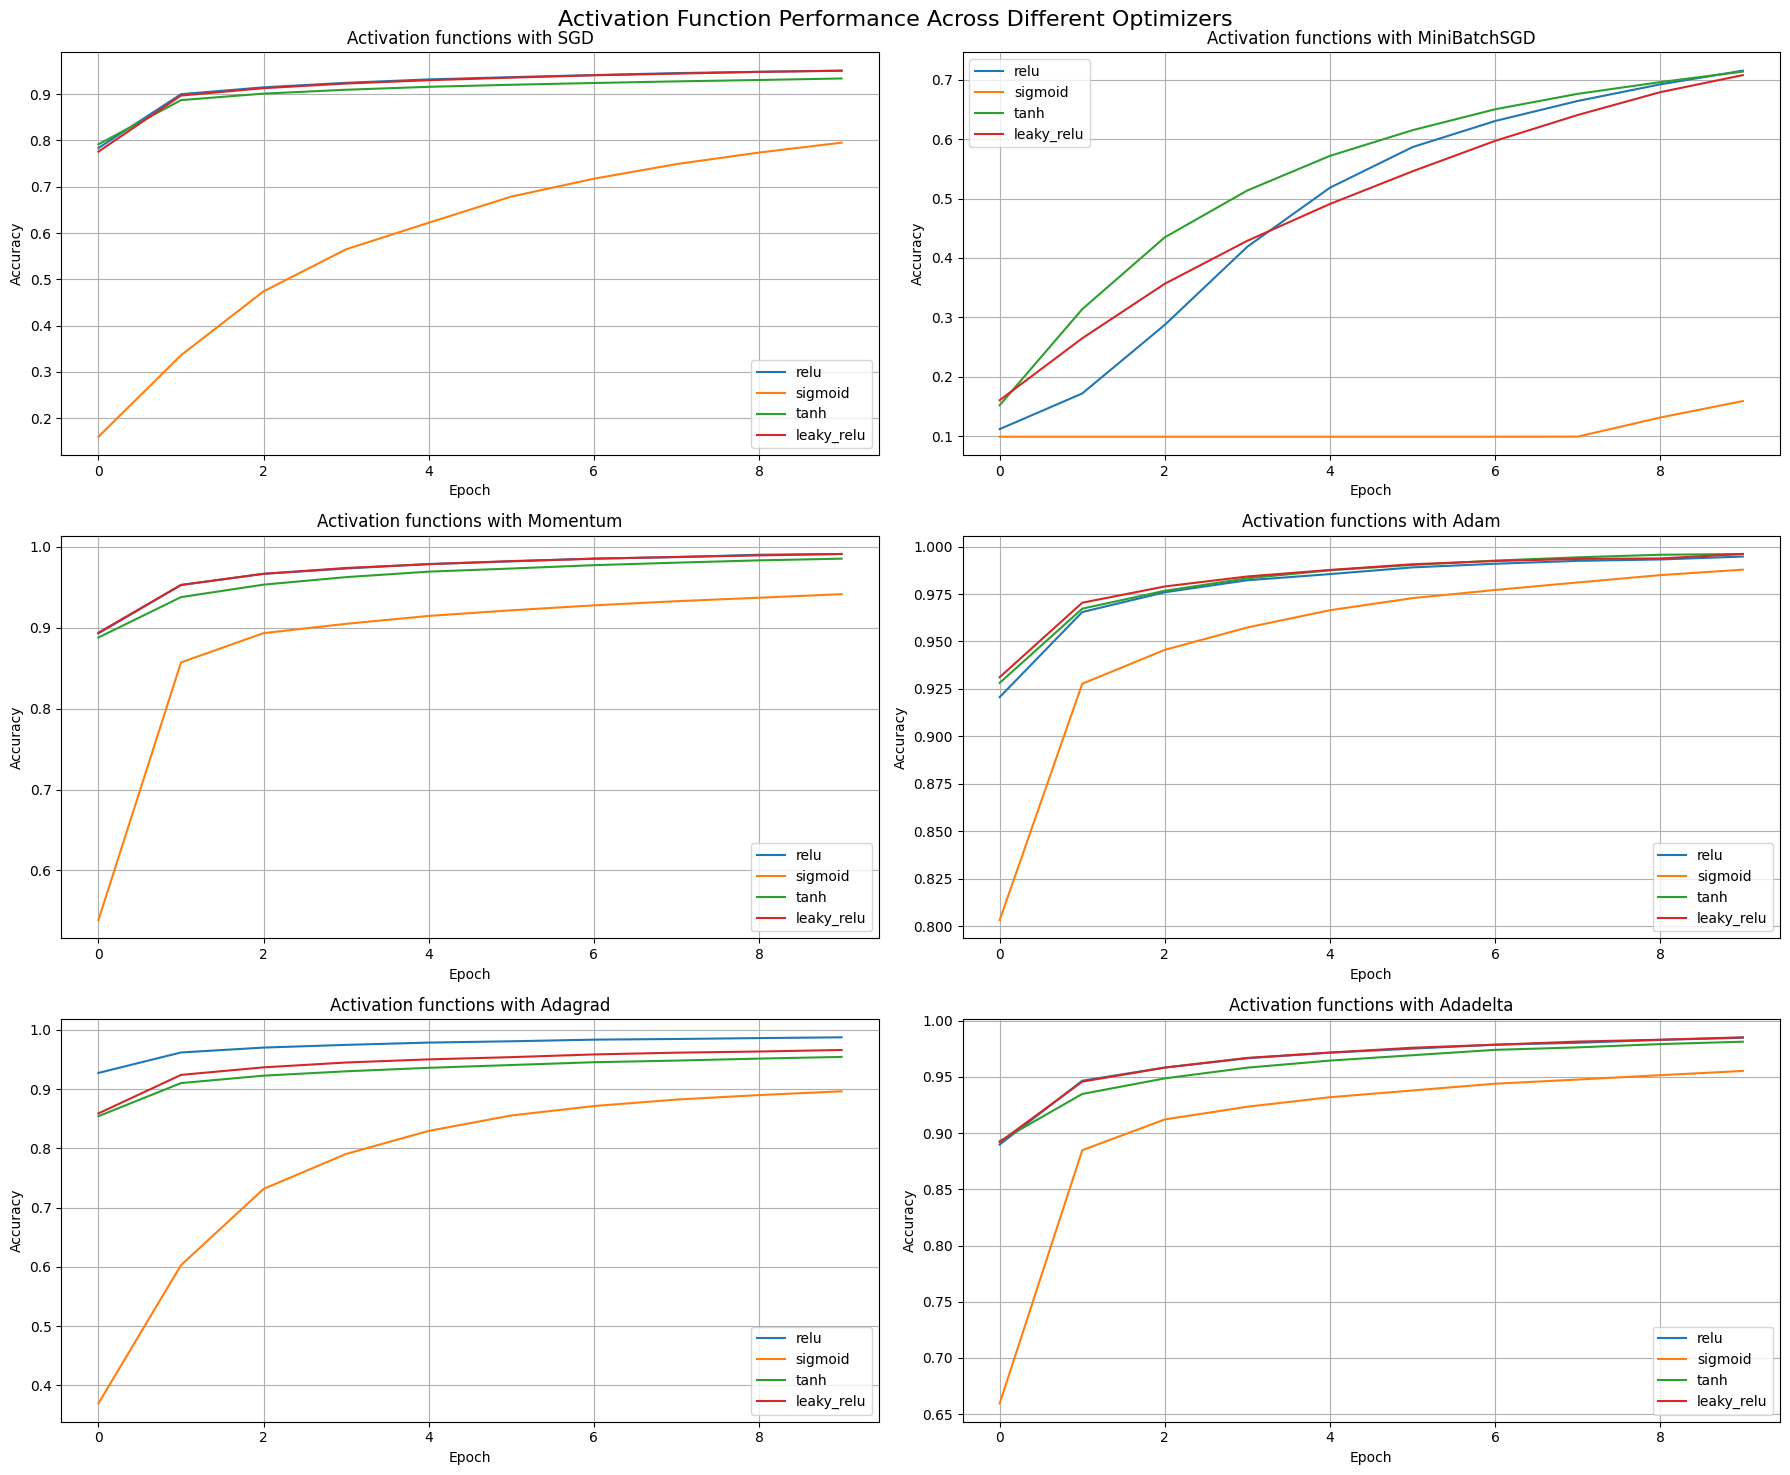


Final Test Accuracies:
relu + SGD: 0.9496
relu + MiniBatchSGD: 0.7311
relu + Momentum: 0.9736
relu + Adam: 0.9765
relu + Adagrad: 0.9731
relu + Adadelta: 0.9716
sigmoid + SGD: 0.8086
sigmoid + MiniBatchSGD: 0.1143
sigmoid + Momentum: 0.9416
sigmoid + Adam: 0.9704
sigmoid + Adagrad: 0.9031
sigmoid + Adadelta: 0.9535
tanh + SGD: 0.9326
tanh + MiniBatchSGD: 0.7155
tanh + Momentum: 0.9717
tanh + Adam: 0.9748
tanh + Adagrad: 0.9524
tanh + Adadelta: 0.9701
leaky_relu + SGD: 0.9519
leaky_relu + MiniBatchSGD: 0.7005
leaky_relu + Momentum: 0.9760
leaky_relu + Adam: 0.9774
leaky_relu + Adagrad: 0.9591
leaky_relu + Adadelta: 0.9725


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split

# Load MNIST dataset
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
X = mnist.data.astype('float32') / 255.0  # Normalize to [0,1]
y = mnist.target.astype('int64')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Activation functions
def relu(x):
    return np.maximum(0, x)

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def tanh(x):
    return np.tanh(x)

def leaky_relu(x, alpha=0.01):
    return np.where(x > 0, x, alpha * x)

def softmax(x):
    exps = np.exp(x - np.max(x, axis=1, keepdims=True))
    return exps / np.sum(exps, axis=1, keepdims=True)

# Derivatives of activation functions
def relu_derivative(x):
    return (x > 0).astype(float)

def sigmoid_derivative(x):
    s = sigmoid(x)
    return s * (1 - s)

def tanh_derivative(x):
    return 1 - tanh(x)**2

def leaky_relu_derivative(x, alpha=0.01):
    return np.where(x > 0, 1, alpha)

# Optimizers
class SGD:
    def __init__(self, lr=0.01):
        self.lr = lr

    def update(self, params, grads):
        for param, grad in zip(params, grads):
            param -= self.lr * grad

class MiniBatchSGD:
    def __init__(self, lr=0.01, batch_size=32):
        self.lr = lr
        self.batch_size = batch_size

    def update(self, params, grads):
        for param, grad in zip(params, grads):
            param -= self.lr * grad / self.batch_size  # Normalize by batch size

class Momentum:
    def __init__(self, lr=0.01, momentum=0.9):
        self.lr = lr
        self.momentum = momentum
        self.velocity = None

    def update(self, params, grads):
        if self.velocity is None:
            self.velocity = [np.zeros_like(param) for param in params]

        for i, (param, grad) in enumerate(zip(params, grads)):
            self.velocity[i] = self.momentum * self.velocity[i] - self.lr * grad
            param += self.velocity[i]

class Adam:
    def __init__(self, lr=0.001, beta1=0.9, beta2=0.999, epsilon=1e-8):
        self.lr = lr
        self.beta1 = beta1
        self.beta2 = beta2
        self.epsilon = epsilon
        self.m = None
        self.v = None
        self.t = 0

    def update(self, params, grads):
        if self.m is None:
            self.m = [np.zeros_like(param) for param in params]
            self.v = [np.zeros_like(param) for param in params]

        self.t += 1
        for i, (param, grad) in enumerate(zip(params, grads)):
            self.m[i] = self.beta1 * self.m[i] + (1 - self.beta1) * grad
            self.v[i] = self.beta2 * self.v[i] + (1 - self.beta2) * (grad ** 2)

            m_hat = self.m[i] / (1 - self.beta1**self.t)
            v_hat = self.v[i] / (1 - self.beta2**self.t)

            param -= self.lr * m_hat / (np.sqrt(v_hat) + self.epsilon)

class Adagrad:
    def __init__(self, lr=0.01, epsilon=1e-8):
        self.lr = lr
        self.epsilon = epsilon
        self.cache = None

    def update(self, params, grads):
        if self.cache is None:
            self.cache = [np.zeros_like(param) for param in params]

        for i, (param, grad) in enumerate(zip(params, grads)):
            self.cache[i] += grad**2
            param -= self.lr * grad / (np.sqrt(self.cache[i]) + self.epsilon)

class Adadelta:
    def __init__(self, rho=0.95, epsilon=1e-8):
        self.rho = rho
        self.epsilon = epsilon
        self.acc_grad = None
        self.acc_update = None

    def update(self, params, grads):
        if self.acc_grad is None:
            self.acc_grad = [np.zeros_like(param) for param in params]
            self.acc_update = [np.zeros_like(param) for param in params]

        for i, (param, grad) in enumerate(zip(params, grads)):
            self.acc_grad[i] = self.rho * self.acc_grad[i] + (1 - self.rho) * grad**2
            update = grad * np.sqrt(self.acc_update[i] + self.epsilon) / np.sqrt(self.acc_grad[i] + self.epsilon)
            param -= update
            self.acc_update[i] = self.rho * self.acc_update[i] + (1 - self.rho) * update**2

# Neural Network Implementation
class NeuralNetwork:
    def __init__(self, layer_sizes, activation='relu'):
        self.layer_sizes = layer_sizes
        self.activation = activation
        self.weights = []
        self.biases = []

        # Initialize weights and biases
        for i in range(len(layer_sizes)-1):
            if activation in ['relu', 'leaky_relu']:
                std = np.sqrt(2. / layer_sizes[i])  # He initialization
            else:
                std = np.sqrt(1. / layer_sizes[i])  # Xavier/Glorot initialization
            self.weights.append(np.random.randn(layer_sizes[i], layer_sizes[i+1]) * std)
            self.biases.append(np.zeros(layer_sizes[i+1]))

    def forward(self, x):
        self.activations = [x]
        self.zs = []

        for i, (w, b) in enumerate(zip(self.weights[:-1], self.biases[:-1])):
            z = np.dot(self.activations[-1], w) + b
            self.zs.append(z)

            if self.activation == 'relu':
                a = relu(z)
            elif self.activation == 'sigmoid':
                a = sigmoid(z)
            elif self.activation == 'tanh':
                a = tanh(z)
            elif self.activation == 'leaky_relu':
                a = leaky_relu(z)

            self.activations.append(a)

        # Output layer
        z = np.dot(self.activations[-1], self.weights[-1]) + self.biases[-1]
        self.zs.append(z)
        a = softmax(z)
        self.activations.append(a)

        return a

    def backward(self, x, y):
        grad_w = [np.zeros_like(w) for w in self.weights]
        grad_b = [np.zeros_like(b) for b in self.biases]

        # Output error
        delta = self.activations[-1].copy()
        delta[np.arange(len(y)), y] -= 1
        delta /= len(y)

        grad_w[-1] = np.dot(self.activations[-2].T, delta)
        grad_b[-1] = np.sum(delta, axis=0)

        # Backpropagate through hidden layers
        for l in range(2, len(self.layer_sizes)):
            z = self.zs[-l]

            if self.activation == 'relu':
                delta = np.dot(delta, self.weights[-l+1].T) * relu_derivative(z)
            elif self.activation == 'sigmoid':
                delta = np.dot(delta, self.weights[-l+1].T) * sigmoid_derivative(z)
            elif self.activation == 'tanh':
                delta = np.dot(delta, self.weights[-l+1].T) * tanh_derivative(z)
            elif self.activation == 'leaky_relu':
                delta = np.dot(delta, self.weights[-l+1].T) * leaky_relu_derivative(z)

            grad_w[-l] = np.dot(self.activations[-l-1].T, delta)
            grad_b[-l] = np.sum(delta, axis=0)

        return grad_w, grad_b

    def compute_loss(self, y_pred, y_true):
        m = y_true.shape[0]
        log_likelihood = -np.log(y_pred[np.arange(m), y_true])
        return np.sum(log_likelihood) / m

    def compute_accuracy(self, y_pred, y_true):
        return np.mean(np.argmax(y_pred, axis=1) == y_true)

    def train(self, X, y, optimizer, epochs=10, batch_size=32):
        history = {'loss': [], 'accuracy': []}

        for epoch in range(epochs):
            permutation = np.random.permutation(len(X))
            X_shuffled = X[permutation]
            y_shuffled = y[permutation]

            epoch_loss = 0
            correct = 0

            for i in range(0, len(X), batch_size):
                X_batch = X_shuffled[i:i+batch_size]
                y_batch = y_shuffled[i:i+batch_size]

                # Forward pass
                output = self.forward(X_batch)

                # Compute metrics
                loss = self.compute_loss(output, y_batch)
                epoch_loss += loss
                correct += np.sum(np.argmax(output, axis=1) == y_batch)

                # Backward pass
                grad_w, grad_b = self.backward(X_batch, y_batch)

                # Update parameters
                optimizer.update(self.weights + self.biases, grad_w + grad_b)

            # Store epoch results
            avg_loss = epoch_loss / (len(X) / batch_size)
            accuracy = correct / len(X)
            history['loss'].append(avg_loss)
            history['accuracy'].append(accuracy)

            print(f"Epoch {epoch+1}/{epochs} - Loss: {avg_loss:.4f} - Accuracy: {accuracy:.4f}")

        return history

# Run experiments with all combinations
def run_comprehensive_test():
    layer_sizes = [784, 128, 64, 10]
    epochs = 10
    batch_size = 64

    optimizers = {
        'SGD': SGD(lr=0.01),
        'MiniBatchSGD': MiniBatchSGD(lr=0.01, batch_size=batch_size),
        'Momentum': Momentum(lr=0.01),
        'Adam': Adam(lr=0.001),
        'Adagrad': Adagrad(lr=0.01),
        'Adadelta': Adadelta()
    }

    activations = ['relu', 'sigmoid', 'tanh', 'leaky_relu']

    # Store results
    results = {act: {opt: None for opt in optimizers} for act in activations}

    # Run all combinations
    for activation in activations:
        for opt_name, optimizer in optimizers.items():
            print(f"\n=== Training with {activation} activation and {opt_name} optimizer ===")
            nn = NeuralNetwork(layer_sizes, activation=activation)
            history = nn.train(X_train, y_train, optimizer, epochs=epochs, batch_size=batch_size)
            results[activation][opt_name] = history

    return results

# Run the comprehensive test
all_results = run_comprehensive_test()

# Visualization
plt.figure(figsize=(18, 12))

# Plot 1: Compare optimizers for each activation function
for i, activation in enumerate(all_results.keys()):
    plt.subplot(2, 2, i+1)
    for opt_name, history in all_results[activation].items():
        plt.plot(history['accuracy'], label=opt_name)
    plt.title(f'Optimizers with {activation} activation')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)

plt.suptitle('Optimizer Performance Across Different Activation Functions', fontsize=16)
plt.tight_layout()

# Plot 2: Compare activation functions for each optimizer
optimizer_names = list(all_results['relu'].keys())
plt.figure(figsize=(18, 15))
for i, opt_name in enumerate(optimizer_names):
    plt.subplot(3, 2, i+1)
    for activation in all_results.keys():
        plt.plot(all_results[activation][opt_name]['accuracy'], label=activation)
    plt.title(f'Activation functions with {opt_name}')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)

plt.suptitle('Activation Function Performance Across Different Optimizers', fontsize=16)
plt.tight_layout()

plt.show()

# Now print test accuracies using the trained models
print("\nFinal Test Accuracies:")
for activation in trained_models.keys():
    for opt_name, model in trained_models[activation].items():
        test_output = model.forward(X_test)
        accuracy = model.compute_accuracy(test_output, y_test)
        print(f"{activation} + {opt_name}: {accuracy:.4f}")

